# 서울시 CCTV 현황 데이터 분석

In [1]:
import numpy as np
import pandas as pd

## 1. 서울통계서비스 사이트에서 '주민등록인구(구별)' 통계에서 2018년도 데이터를 다운 받아서 '서울시 인구현황.txt' 파일로 저장한다.

## 2. 파일에서 데이터를 읽어 컬럼이 '자치구', '인구수', '내국인', '외국인', '고령자' 인 데이터 프레임을 만든다.(pop)

In [2]:
pop = pd.read_csv('서울시 인구현황.txt', sep='\t', thousands=',', 
                  skiprows=[0,1,2,3], usecols=[1,3,6,9,13], 
                  names=['자치구','인구수','내국인','외국인','고령자'])                
pop

,자치구,인구수,내국인,외국인,고령자
0,종로구,163026,153065,9961,26742
1,중구,135633,125725,9908,22005
2,용산구,245090,228999,16091,37640
3,성동구,316463,308221,8242,42767
4,광진구,371063,355559,15504,45619
5,동대문구,364338,348052,16286,57165
6,중랑구,408147,403209,4938,61830
7,성북구,447687,435868,11819,67782
8,강북구,322915,319164,3751,58196
9,도봉구,341649,339413,2236,55964


## 3. 외국인 비율과 고령자 비율을 추가한다.

In [3]:
pop['외국인 비율'] = pop['외국인'] / pop['인구수'] * 100
pop['고령자 비율'] = pop['고령자'] / pop['인구수'] * 100
pop.head()

,자치구,인구수,내국인,외국인,고령자,외국인 비율,고령자 비율
0,종로구,163026,153065,9961,26742,6.110068,16.403518
1,중구,135633,125725,9908,22005,7.305007,16.223928
2,용산구,245090,228999,16091,37640,6.565343,15.357624
3,성동구,316463,308221,8242,42767,2.604412,13.514060
4,광진구,371063,355559,15504,45619,4.178266,12.294139


## 4. 서울시 자치구 년도별 CCTV 설치 현황 데이터를 다운 받아서 '서울시 자치구 년도별 CCTV 설치 현황.xlsx' 파일로 저장한후, 데이터를 읽서 데이터 프레임을 만든다.(cctv)

In [4]:
cctv = pd.read_excel('서울시 자치구 년도별 CCTV 설치 현황.xlsx')
cctv

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강 서 구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671
5,광 진 구,1581,470.0,42.0,83.0,87,64,21,468,346
6,구 로 구,3227,852.0,219.0,349.0,187,268,326,540,486
7,금 천 구,1634,27.0,17.0,242.0,101,382,136,199,530
8,노 원 구,1906,481.0,117.0,203.0,80,461,298,110,156
9,도 봉 구,858,197.0,66.0,8.0,185,59,155,117,71


## 5. '기관명' 컬럼 데이터의 빈칸을 없애고, 컬럼명을 '자치구'로 변경한다.

In [5]:
cctv['기관명'].unique()

array(['강 남 구', '강 동 구', '강 북 구', '강 서 구', '관 악 구', '광 진 구', '구 로 구',
       '금 천 구', '노 원 구', '도 봉 구', '동대문구', '동 작 구', '마 포 구', '서대문구',
       '서 초 구', '성 동 구', '성 북 구', '송 파 구', '양 천 구', '영등포구', '용 산 구',
       '은 평 구', '종 로 구', '중     구', '중 랑 구'], dtype=object)

In [6]:
cctv['기관명'] = [x.replace(' ','') for x in cctv['기관명'].unique()]
cctv.head()

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671


In [7]:
cctv['기관명'] = ['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구',
       '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구',
       '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구',
       '은평구', '종로구', '중구', '중랑구']

In [8]:
cctv.rename(columns={'기관명': '자치구'}, inplace=True)
cctv.head()

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671


## 6. 2015년 이전의 데이터를 합하여 '2015년 이전' 컬럼을 만들고, 최근 3개년간의 데이터를 합하여 '최근 3개년' 컬럼을 만든 후, '최근 증가율' 컬럼을 만든다.

In [9]:
cctv[['2011년 이전', '2012년', '2013년']] = \
    cctv[['2011년 이전', '2012년', '2013년']].fillna(0).astype(int)
# cctv['2011년 이전'] = cctv['2011년 이전'].fillna(0).astype(int)
# cctv['2012년'] = cctv['2012년'].fillna(0).astype(int)
# cctv['2013년'] = cctv['2013년'].fillna(0).astype(int)
cctv

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944,195,316,430,546,765,577,448
1,강동구,1879,303,387,134,59,144,194,273,385
2,강북구,1265,243,88,141,74,145,254,1,319
3,강서구,1617,219,155,118,230,187,190,264,254
4,관악구,3985,430,56,419,487,609,619,694,671
5,광진구,1581,470,42,83,87,64,21,468,346
6,구로구,3227,852,219,349,187,268,326,540,486
7,금천구,1634,27,17,242,101,382,136,199,530
8,노원구,1906,481,117,203,80,461,298,110,156
9,도봉구,858,197,66,8,185,59,155,117,71


In [10]:
cctv['2015년 이전'] = cctv[['2011년 이전', '2012년', '2013년', '2014년', '2015년']].sum(axis=1)
# cctv['xxx'] = cctv.iloc[:, 2:7].sum(axis=1)
cctv.head()

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2015년 이전
0,강남구,5221,1944,195,316,430,546,765,577,448,3431
1,강동구,1879,303,387,134,59,144,194,273,385,1027
2,강북구,1265,243,88,141,74,145,254,1,319,691
3,강서구,1617,219,155,118,230,187,190,264,254,909
4,관악구,3985,430,56,419,487,609,619,694,671,2001


In [11]:
cctv['최근 3개년'] = cctv[['2016년', '2017년', '2018년']].sum(axis=1)
cctv['최근 증가율'] = cctv['최근 3개년'] / cctv['2015년 이전'] * 100
cctv.head()

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2015년 이전,최근 3개년,최근 증가율
0,강남구,5221,1944,195,316,430,546,765,577,448,3431,1790,52.171379
1,강동구,1879,303,387,134,59,144,194,273,385,1027,852,82.960078
2,강북구,1265,243,88,141,74,145,254,1,319,691,574,83.068017
3,강서구,1617,219,155,118,230,187,190,264,254,909,708,77.887789
4,관악구,3985,430,56,419,487,609,619,694,671,2001,1984,99.150425


## 7. '자치구', '소계', '최근 증가율' 컬럼을 제외하고 나머지는 모두 삭제한다.

In [12]:
cctv.drop(['2011년 이전', '2012년', '2013년', '2014년', '2015년'], axis=1,
          inplace=True)
cctv.head()

,자치구,소계,2016년,2017년,2018년,2015년 이전,최근 3개년,최근 증가율
0,강남구,5221,765,577,448,3431,1790,52.171379
1,강동구,1879,194,273,385,1027,852,82.960078
2,강북구,1265,254,1,319,691,574,83.068017
3,강서구,1617,190,264,254,909,708,77.887789
4,관악구,3985,619,694,671,2001,1984,99.150425


In [13]:
del cctv['2016년']
cctv.head()

,자치구,소계,2017년,2018년,2015년 이전,최근 3개년,최근 증가율
0,강남구,5221,577,448,3431,1790,52.171379
1,강동구,1879,273,385,1027,852,82.960078
2,강북구,1265,1,319,691,574,83.068017
3,강서구,1617,264,254,909,708,77.887789
4,관악구,3985,694,671,2001,1984,99.150425


In [14]:
del cctv['2017년']
del cctv['2018년']
del cctv['2015년 이전']
del cctv['최근 3개년']
cctv.head()

,자치구,소계,최근 증가율
0,강남구,5221,52.171379
1,강동구,1879,82.960078
2,강북구,1265,83.068017
3,강서구,1617,77.887789
4,관악구,3985,99.150425


## 8. 서울시 인구 데이터와 cctv 데이터를 합치고, '자치구'를 인덱스로 만든다.

In [15]:
pop.head()

,자치구,인구수,내국인,외국인,고령자,외국인 비율,고령자 비율
0,종로구,163026,153065,9961,26742,6.110068,16.403518
1,중구,135633,125725,9908,22005,7.305007,16.223928
2,용산구,245090,228999,16091,37640,6.565343,15.357624
3,성동구,316463,308221,8242,42767,2.604412,13.514060
4,광진구,371063,355559,15504,45619,4.178266,12.294139


In [16]:
df = pd.merge(cctv, pop, on='자치구')
df.head()

,자치구,소계,최근 증가율,인구수,내국인,외국인,고령자,외국인 비율,고령자 비율
0,강남구,5221,52.171379,547453,542364,5089,67085,0.929578,12.254020
1,강동구,1879,82.960078,431920,427573,4347,58770,1.006436,13.606686
2,강북구,1265,83.068017,322915,319164,3751,58196,1.161606,18.022080
3,강서구,1617,77.887789,603611,596949,6662,79660,1.103691,13.197241
4,관악구,3985,99.150425,520040,501957,18083,72249,3.477233,13.892970


In [17]:
df.set_index('자치구', inplace=True)
df.head()

,소계,최근 증가율,인구수,내국인,외국인,고령자,외국인 비율,고령자 비율
자치구,,,,,,,,
강남구,5221,52.171379,547453,542364,5089,67085,0.929578,12.254020
강동구,1879,82.960078,431920,427573,4347,58770,1.006436,13.606686
강북구,1265,83.068017,322915,319164,3751,58196,1.161606,18.022080
강서구,1617,77.887789,603611,596949,6662,79660,1.103691,13.197241
관악구,3985,99.150425,520040,501957,18083,72249,3.477233,13.892970


## 9. CCTV 현황을 다양한 형태로 시각화하여 보여준다.

In [18]:
# Matplotlib 사용과 한글 처리를 위한 Code
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False   # minus 표시
mpl.rc('font', family='Malgun Gothic')
%matplotlib inline

In [19]:
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["font.size"] = 14

### - 자치구별 CCTV 댓수 (내림차순으로)

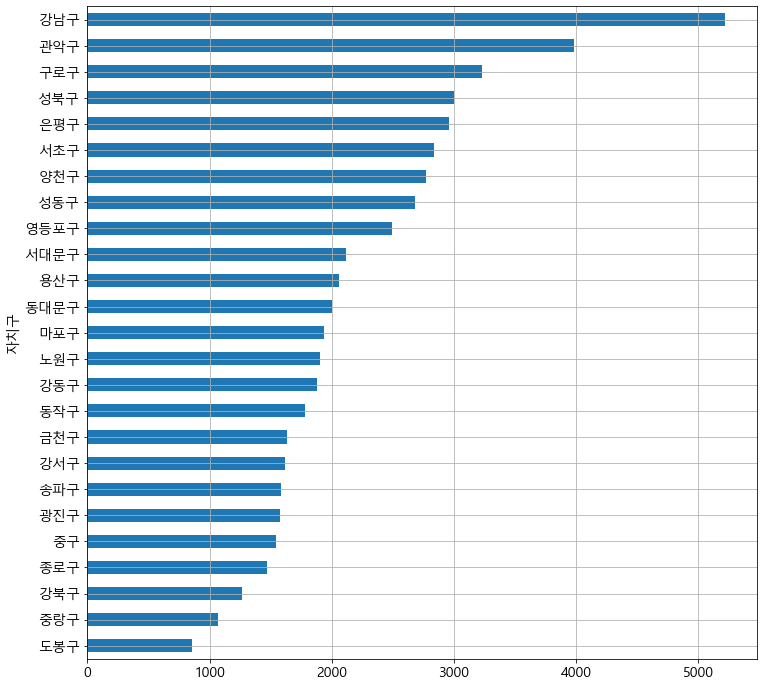

In [43]:
df['소계'].sort_values().plot(kind='barh', grid=True, figsize=(12,12))
plt.show()

### - 자치구별 인당 CCTV 댓수 (내림차순으로)

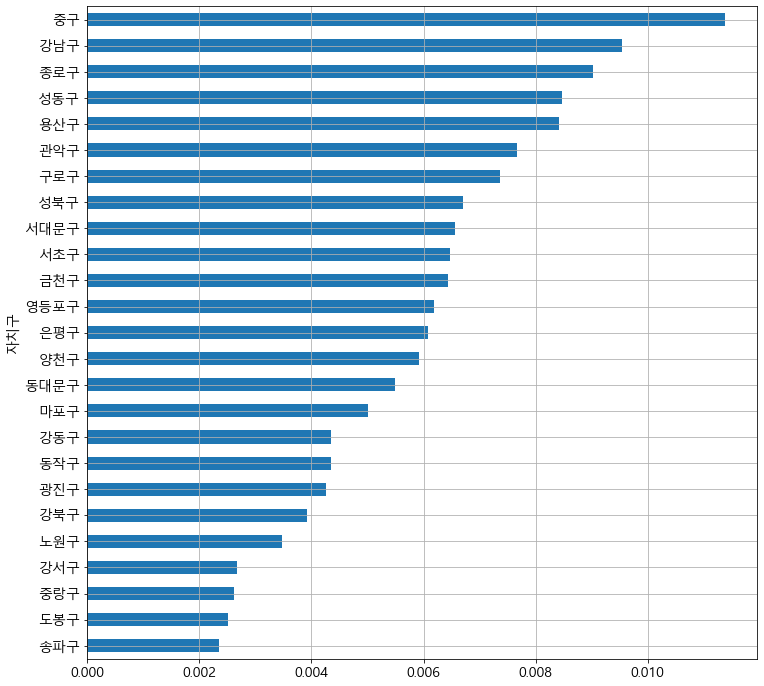

In [24]:
df['인당 CCTV'] = df['소계'] / df['인구수']
df['인당 CCTV'].sort_values().plot(kind='barh', grid=True, figsize=(12,12))
plt.show()

### - 자치구별  최근 증가율 (내림차순으로)

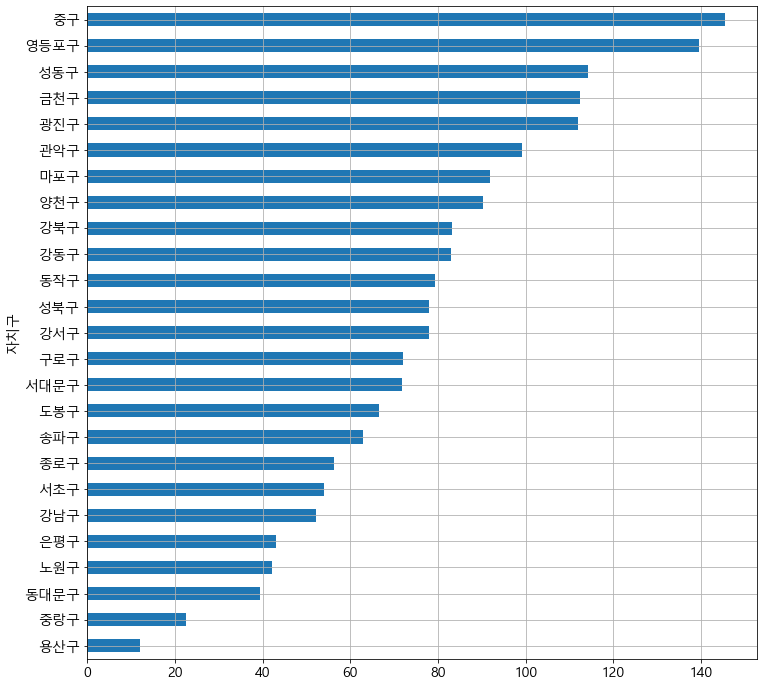

In [27]:
df['최근 증가율'].sort_values().plot(kind='barh', grid=True, figsize=(12,12))
plt.show()

### - 인구수와 CCTV 댓수의 산점도

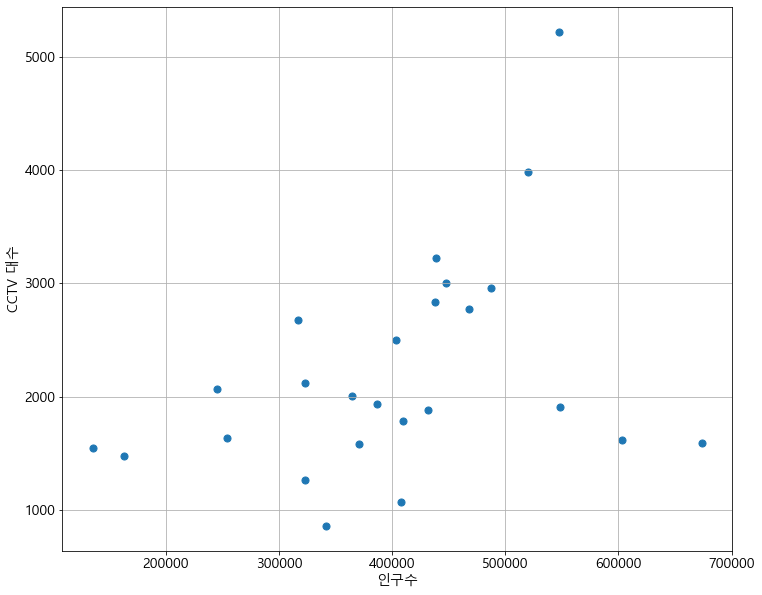

In [32]:
plt.figure(figsize=(12,10))
plt.scatter(df['인구수'], df['소계'], s=50)
plt.xlabel('인구수')
plt.ylabel('CCTV 대수')
plt.grid()
plt.show()

### - 인구수와 CCTV 댓수의 산점도 및 회귀선

In [34]:
fp1 = np.polyfit(df['인구수'], df['소계'], 1)
fp1

array([2.85240371e-03, 1.07309855e+03])

In [35]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 101)

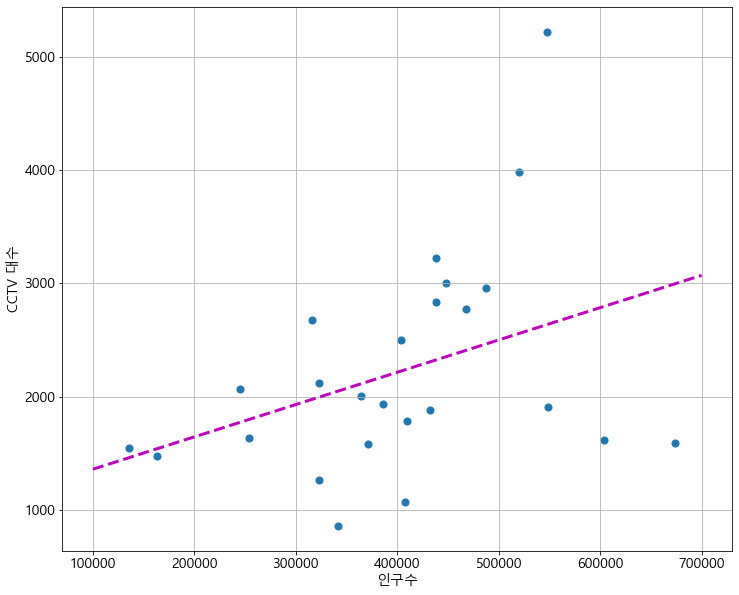

In [36]:
plt.figure(figsize=(12,10))
plt.scatter(df['인구수'], df['소계'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='m')
plt.xlabel('인구수')
plt.ylabel('CCTV 대수')
plt.grid()
plt.show()

### - 인구수와 CCTV 댓수의 산점도, 회귀선 및 자치구명

In [44]:
df.head()

,소계,최근 증가율,인구수,내국인,외국인,고령자,외국인 비율,고령자 비율,인당 CCTV
자치구,,,,,,,,,
강남구,5221,52.171379,547453,542364,5089,67085,0.929578,12.254020,0.009537
강동구,1879,82.960078,431920,427573,4347,58770,1.006436,13.606686,0.004350
강북구,1265,83.068017,322915,319164,3751,58196,1.161606,18.022080,0.003917
강서구,1617,77.887789,603611,596949,6662,79660,1.103691,13.197241,0.002679
관악구,3985,99.150425,520040,501957,18083,72249,3.477233,13.892970,0.007663


In [45]:
df['오차'] = np.abs(df['소계'] - f1(df['인구수']))
df.head()

,소계,최근 증가율,인구수,내국인,외국인,고령자,외국인 비율,고령자 비율,인당 CCTV,오차
자치구,,,,,,,,,,
강남구,5221,52.171379,547453,542364,5089,67085,0.929578,12.254020,0.009537,2586.344483
강동구,1879,82.960078,431920,427573,4347,58770,1.006436,13.606686,0.004350,426.108759
강북구,1265,83.068017,322915,319164,3751,58196,1.161606,18.022080,0.003917,729.182492
강서구,1617,77.887789,603611,596949,6662,79660,1.103691,13.197241,0.002679,1177.840805
관악구,3985,99.150425,520040,501957,18083,72249,3.477233,13.892970,0.007663,1428.537426


In [46]:
df_sort = df.sort_values(by='오차', ascending=False)
df_sort.head(10)

,소계,최근 증가율,인구수,내국인,외국인,고령자,외국인 비율,고령자 비율,인당 CCTV,오차
자치구,,,,,,,,,,
강남구,5221,52.171379,547453,542364,5089,67085,0.929578,12.254020,0.009537,2586.344483
관악구,3985,99.150425,520040,501957,18083,72249,3.477233,13.892970,0.007663,1428.537426
송파구,1586,62.833676,673507,666635,6872,81364,1.020331,12.080647,0.002355,1408.212414
도봉구,858,66.601942,341649,339413,2236,55964,0.654473,16.380554,0.002511,1189.619423
강서구,1617,77.887789,603611,596949,6662,79660,1.103691,13.197241,0.002679,1177.840805
중랑구,1068,22.477064,408147,403209,4938,61830,1.209858,15.148954,0.002617,1169.298565
구로구,3227,72.106667,438486,404497,33989,61801,7.751445,14.094179,0.007359,903.162358
노원구,1906,42.026826,548160,543752,4408,77096,0.804145,14.064507,0.003477,730.672166
강북구,1265,83.068017,322915,319164,3751,58196,1.161606,18.022080,0.003917,729.182492


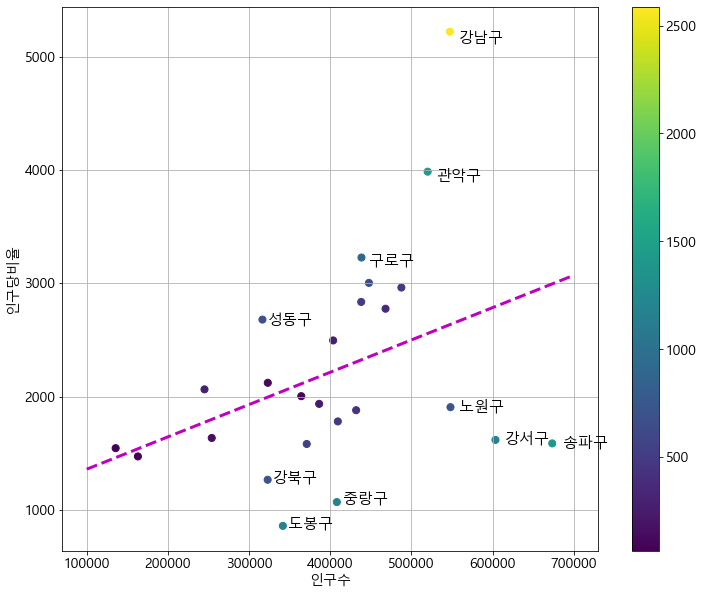

In [49]:
plt.figure(figsize=(12,10))
plt.scatter(df['인구수'], df['소계'], c=df['오차'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='m')

for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98,
             df_sort.index[n], fontsize=15)
        
plt.xlabel('인구수')
plt.ylabel('인구당비율')
plt.colorbar()
plt.grid()
plt.show()

### - 고령자 비율 vs 인당 CCTV

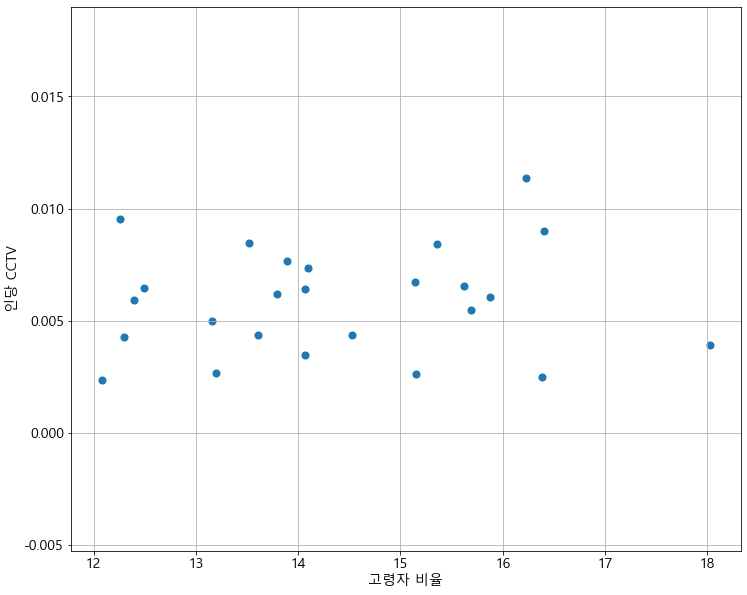

In [50]:
plt.figure(figsize=(12,10))
plt.scatter(df['고령자 비율'], df['인당 CCTV'], s=50)
plt.xlabel('고령자 비율')
plt.ylabel('인당 CCTV')
plt.grid()
plt.show()

In [ ]:
f

### - 외국인 비율 vs 인당 CCTV

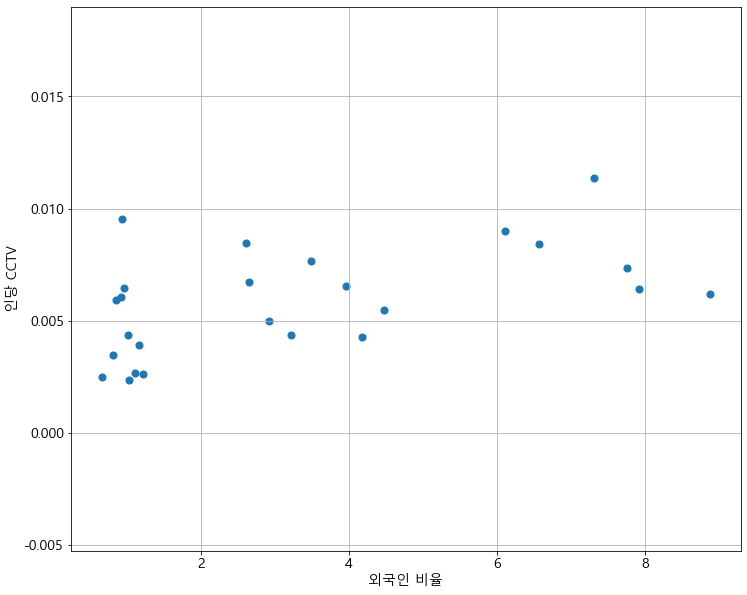

In [51]:
plt.figure(figsize=(12,10))
plt.scatter(df['외국인 비율'], df['인당 CCTV'], s=50)
plt.xlabel('외국인 비율')
plt.ylabel('인당 CCTV')
plt.grid()
plt.show()

In [52]:
fp3 = np.polyfit(df['외국인 비율'], df['인당 CCTV'], 1)
f3 = np.poly1d(fp3)
fx = np.linspace(0.5, 8.5, 101)

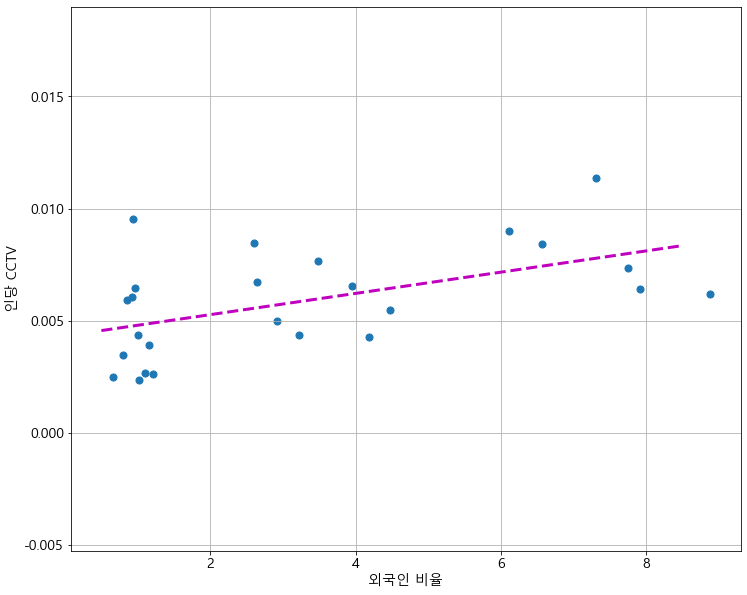

In [53]:
plt.figure(figsize=(12,10))
plt.scatter(df['외국인 비율'], df['인당 CCTV'], s=50)
plt.plot(fx, f3(fx), ls='dashed', lw=3, color='m')
plt.xlabel('외국인 비율')
plt.ylabel('인당 CCTV')
plt.grid()
plt.show()